In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('documents.csv')

In [4]:
doc_splt = [x.split(' ') for x in df['text_right'].tolist()]  

### Task 1
Provide basic collection stats

In [5]:
dictionary = dict()   
avg_doc = []
avg_word = []
avg_uword = []
new_word = [0]
for doc in doc_splt:
    new_words = 0
    for word in doc:
        if word not in dictionary:
            dictionary[word]  = 0
            new_words += 1
        dictionary[word] = dictionary[word] + 1
        avg_word.append(len(word))
    avg_doc.append(len(doc))
    new_word.append(new_word[-1] + new_words)
uw_len = [len(s) for s in dictionary.keys()]    

In [6]:
print("# documents =", len(doc_splt))
print("Avg. document length in words =", round(np.mean(avg_doc),3))
print("Collection size in words =", round(len(doc_splt) * np.mean(avg_doc)))
print("# unique words =", len(dictionary))
print("Avg. word length =", round(np.mean(avg_word),3))
print("Avg. unique word (type) length =", round(np.mean(uw_len),3))

# documents = 369721
Avg. document length in words = 197.7
Collection size in words = 73093729
# unique words = 794568
Avg. word length = 4.795
Avg. unique word (type) length = 7.714


### Task 2
Zipf's law

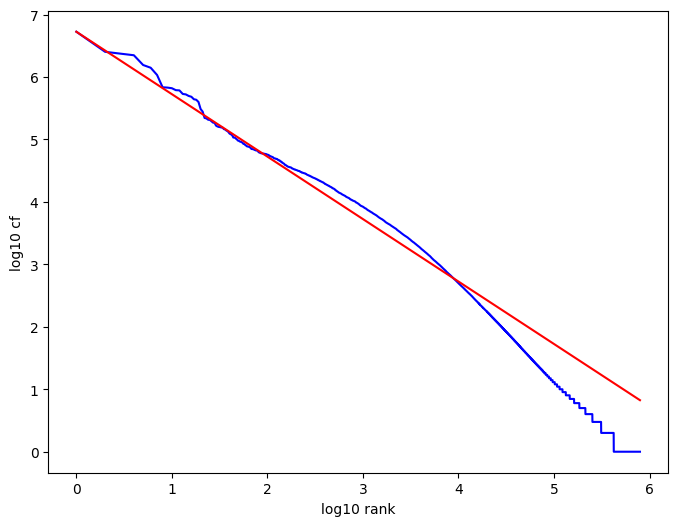

In [7]:
dict_sort = sorted(dictionary.items(), key=lambda x:x[1],reverse=True)
freq = [v[1] for v in dict_sort]
rank = np.arange(1, len(dict_sort)+ 1, 1)
zipf = [ freq[0] / i for i in rank] 
fig = plt.figure(figsize=(8,6))
plt.plot(np.log10(rank),np.log10(freq),'b')
plt.plot(np.log10(rank),np.log10(zipf),'r')
plt.xlabel('log10 rank')
plt.ylabel('log10 cf')
plt.show()

### Task 3
Heaps' law

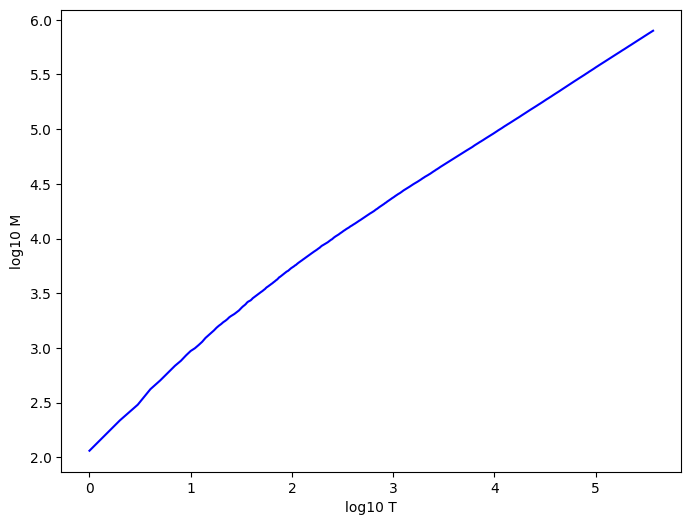

In [9]:
new_docs = np.arange(1, len(doc_splt) + 1, 1)
#heap = [ 100 * pow(i,1) for i in new_docs] 
#here I have tried to estimate parameters k, b, however it was not successful
fig = plt.figure(figsize=(8,6))
plt.plot(np.log10(new_docs),np.log10(new_word[1::]),'b')
#plt.plot(np.log10(new_docs),np.log10(heap),'r')
plt.xlabel('log10 T')
plt.ylabel('log10 M')
plt.show()

### Some additional tasks (not part of assignment)
Plotting frequencies of top30 common words

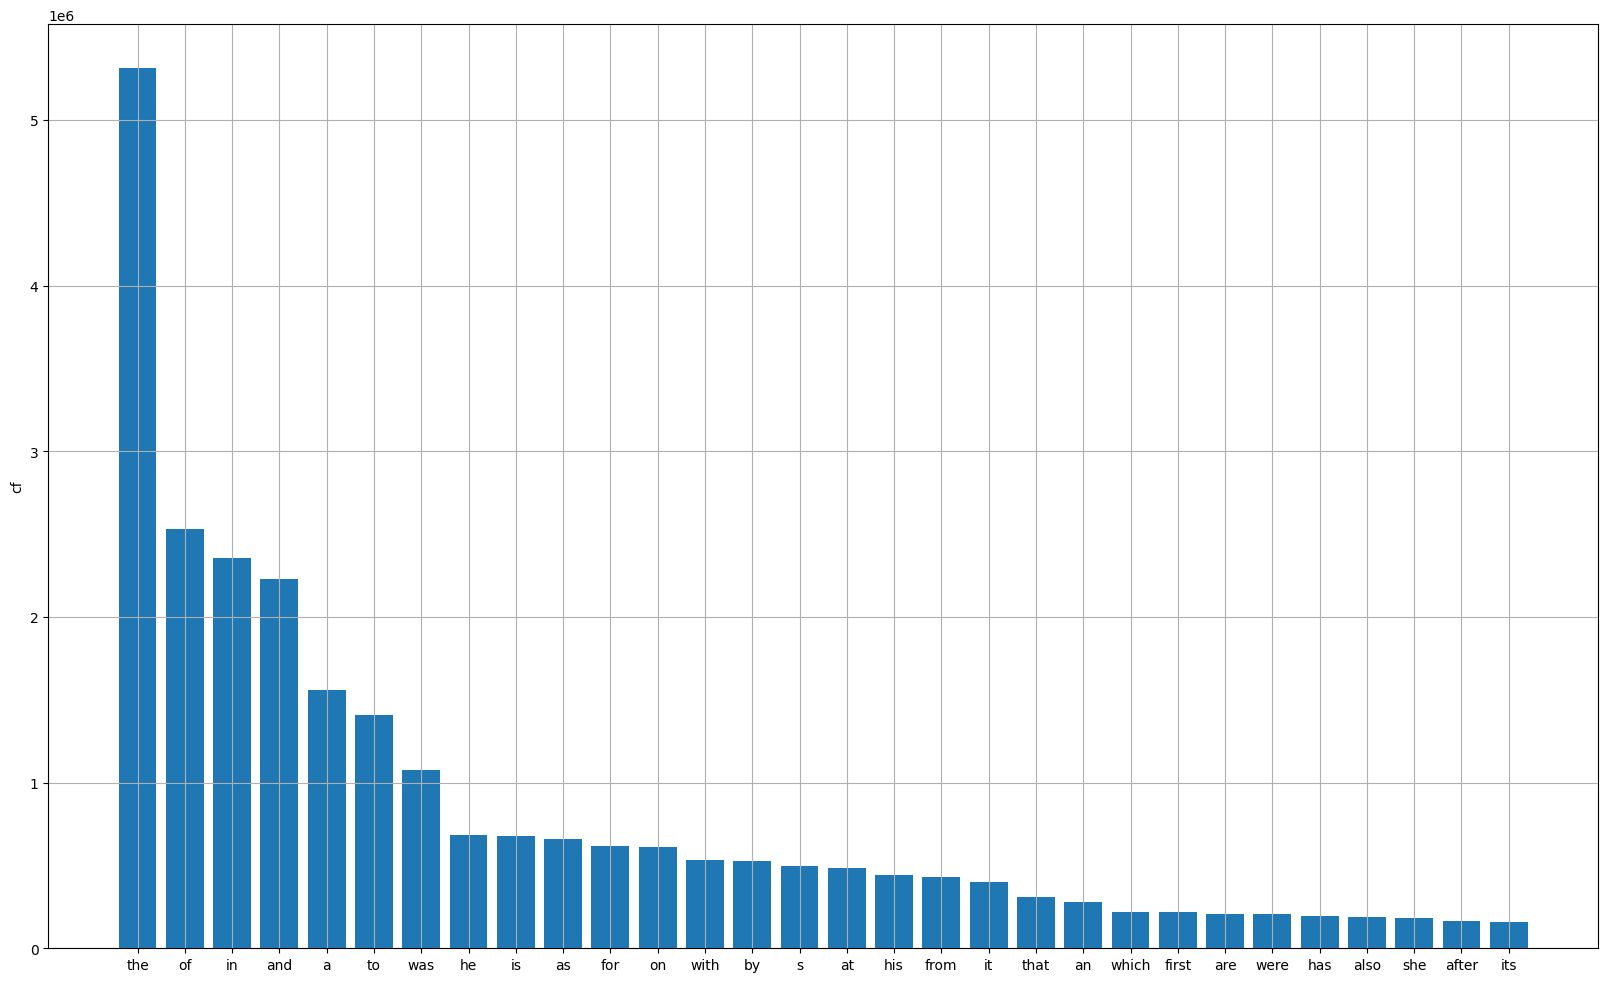

In [10]:
common_words= []
common_words_values = []
for common in dict_sort[:30]:
    common_words.append(common[0])
    common_words_values.append(common[1])
fig = plt.figure(figsize=(20,12))
plt.clf()
plt.bar(common_words, common_words_values)
plt.ylabel('cf')
plt.grid()